In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

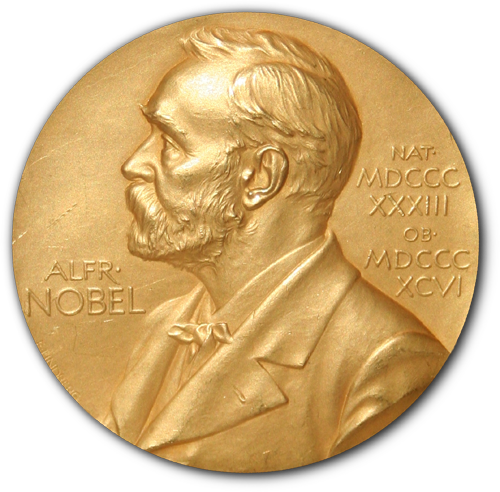

# Interested in Winning a Nobel Prize? Let's have a look at the chance you have 

In [ ]:
Nobel_df=pd.read_csv('/kaggle/input/nobel-prize/complete.csv')
#Nobel_df.info()

# ColorPalette I will use for my Charts

In [ ]:
colors=['Color1', 'Color2', 'Color3', 'Color4']
colors[1] = '#a40a3c'
colors[0]= '#6b0848'
colors[2]='#ec610a'
colors[3]='#ffc300'
fig = go.Figure(data=[go.Bar(
    x=['#a40a3c', '#6b0848', '#ec610a','#ffc300'],
    y=[4, 4, 4, 4],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='<i><b>ColorPalette</b></i>', title_x=0.5, bargap=0, plot_bgcolor="white",font_color='white')

# How many NobelPrize have been assigned per Year and Categories

In [ ]:

count=np.ones((950,), dtype=int)
Nobel_df['Frequency']=count
NobelYear=Nobel_df[['awardYear', 'Frequency']].groupby(['awardYear'])['Frequency'].count()
df_test=NobelYear.reset_index()

In [ ]:
fig_yearNobel = px.line(df_test, x="awardYear", y="Frequency")
fig_yearNobel.update_xaxes(tickangle=45,ticks="inside", tickwidth=2, tickcolor='black', ticklen=10, showline=True, linewidth=2, linecolor='black', mirror=True)
fig_yearNobel.update_yaxes(tickangle=45,ticks="inside", tickwidth=2, tickcolor='black', ticklen=10, showline=True, linewidth=2, linecolor='black', mirror=True)
fig_yearNobel.update_traces(line=dict(color='#6b0848', width=4))
fig_yearNobel.update_layout(title_text='<i><b>Number of NobelPrize Awarded per Year</b></i>', title_x=0.5, title_font_color="#EC610A",title_font_size=24, font_family="Courier New",
    font_color="#EC610A", xaxis_title="Years",
    yaxis_title="Number of NobelPrize Awarded", font_size=15, plot_bgcolor="white")

In [ ]:
count=np.ones((950,), dtype=int)
Nobel_df['Frequency']=count
NobelCategory=Nobel_df[['category', 'Frequency']].groupby(['category'])['Frequency'].count()
nobelCategories=NobelCategory.reset_index()

fig=px.bar(nobelCategories, x='category'  , y='Frequency',   
      )
fig.update_traces(marker_color='#6b0848',width=0.6)
fig.update_layout(title_text='<i><b>Number of Prize Won per Category</b></i>', title_x=0.5, title_font_color="#6b0848",title_font_size=36, font_family="Courier New",
    font_color="#6b0848", xaxis_title="Category",
    yaxis_title="Number of NobelPrize", font_size=15, plot_bgcolor="white")

In [ ]:
Nobel_df['gender'].fillna('organisation' , inplace = True)

In [ ]:
count=np.ones((950,), dtype=int)
Nobel_df['Frequency']=count
NobelCategory_gender=Nobel_df[['category', 'gender','Frequency']].groupby(['category', 'gender'])['Frequency'].count()
NobelCategory_gender_corrected=NobelCategory_gender.reset_index()

fig2=px.bar(
    NobelCategory_gender_corrected, x='category', y='Frequency', color= 'gender',
        color_discrete_sequence=['#a40a3c','#ec610a','#ffc300']
      )
fig2.update_layout(title_text='<i><b>Who Wins Nobel Prizes?</b></i>', title_x=0.5, title_font_color="#6b0848",title_font_size=24, font_family="Courier New",
    font_color="#a40a3c", xaxis_title="Categories",
    yaxis_title="Amount NobelPrize Awarded", font_size=15, plot_bgcolor="white")

# Which Country Won the Highest Number on NobelPrizes?

In [ ]:
Nobel_df['WinningCountry'] = Nobel_df["birth_countryNow"].astype(str) + Nobel_df["org_founded_country"].astype(str)
Country_df = Nobel_df[Nobel_df['WinningCountry'].notna()]
count=np.ones((950,), dtype=int)
Country_df['Frequency']=count
NobelCountry=Country_df[['WinningCountry', 'Frequency']].groupby(['WinningCountry'])['Frequency'].count()
NobelCountryCorrect=NobelCountry.reset_index()

NobelCountryCorrect.sort_values(['Frequency'], axis=0, 
                 ascending=False, inplace=True)

fig_country=px.bar(NobelCountryCorrect.head(20), x='WinningCountry', y='Frequency'     
      )
fig_country.update_traces(marker_color='#6b0848',width=0.6)
fig_country.update_layout(title_text='<i><b>Number of Prize Won per Country - Top 20 -</b></i>', title_x=0.5, title_font_color="#6b0848",title_font_size=24, font_family="Courier New",
    font_color="#6b0848", xaxis_title="Country",
    yaxis_title="Number of NobelPrize", font_size=12, plot_bgcolor="white")

In [ ]:
age=Nobel_df[['birth_date','awardYear']]
age_df = age[age['birth_date'].notna()]

age_df['birth_date'][0]='1943-07-11'
age_df['birth_date'][612]='1993-08-15'
age_df['birth_date'][26]='1898-08-15'
age_df['birth_date'][670]='1955-11-06'
age_df['birth_date'][785]='1959-09-22'
age_df['birth_date'][880]='1952-04-05'

age_df['month']=pd.DatetimeIndex(age_df['birth_date']).month
age_df['year']=pd.DatetimeIndex(age_df['birth_date']).year
age_df['Age']=age_df['awardYear']-age_df['year']

count=np.ones((923,), dtype=int)
age_df['Frequency']=count
ageNobel=age_df[['Age', 'Frequency']].groupby(['Age'])['Frequency'].count()
ageNobel_reset=ageNobel.reset_index()

ageNobel_reset.sort_values(['Frequency'], axis=0, 
                 ascending=False, inplace=True)


# Is the Poissibility of Winning a NobelPrize Depending on your Age?

In [ ]:
fig_age=px.bar(ageNobel_reset, x='Age', y='Frequency')
fig_age.update_traces(marker_color='#6b0848',width=0.6)
fig_age.add_trace(go.Scatter(
    x=[60],
    y=[37],
    text=["Age Range with higher chance to win Nobel Prize",
          ],
    mode="text",
))
fig_age.add_shape(type="rect",
    xref="x", yref="y",
    x0=45, y0=0,
    x1=75, y1=40,
    line=dict(
        color="LightSalmon",
        width=1,
    ),
    fillcolor="LightSalmon",opacity=0.3
)

fig_age.update_layout(title_text='<i><b>At which age do you have more probability to win a NobelPrize? -</b></i>', title_x=0.5, title_font_color="#6b0848",title_font_size=24, font_family="Courier New",
    font_color="#6b0848", xaxis_title="Age",
    yaxis_title="Number of NobelPrize", font_size=12, plot_bgcolor="white")

In [ ]:
count=np.ones((923,), dtype=int)
age_df['Frequency']=count
monthNobel=age_df[['month', 'Frequency']].groupby(['month'])['Frequency'].count()
monthNobel_reset=monthNobel.reset_index()
monthNobel_reset.sort_values(['month'], axis=0, 
                 ascending=True, inplace=True)


# Does your Day of Birth Affect your Chances to Win a NobelPrize? (Actually, not really)

In [ ]:
fig_month=px.bar(monthNobel_reset, x='month', y='Frequency')
fig_month.update_traces(marker_color='#6b0848',width=0.6)


fig_month.add_annotation( # add a text callout with arrow
    text="<b>February is the<br> less lucky month </b>", x="1.9", y=77, arrowhead=1, showarrow=True
)

fig_month.add_annotation( # add a text callout with arrow
    text="<b>Wow! Big Chance<br> for June :) </b>", x="5.9", y=92, arrowhead=1, showarrow=True
)

fig_month.update_layout(title_text='<i><b>Which Month is better to be born to win a NobelPrize</b></i>', title_x=0.5, title_font_color="#6b0848",title_font_size=24, font_family="Courier New",
    font_color="#6b0848", xaxis_title="Month",
    yaxis_title="Number of NobelPrize", font_size=12, plot_bgcolor="white")